In [36]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
housing = fetch_california_housing(as_frame=True)

In [7]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [8]:
data, target = housing.data, housing.target

In [10]:
data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [11]:
target.head(10)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64

In [12]:
target *= 100

In this dataset, the aim is to predict the median value of houses in an area in California. The features collected are based on general real-estate and geographical information. The task is calles regression.


In [13]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=0)

After training the regressor, we would like to know its potential generalization performance once deployed in production. For this purpose, we use the mean absolute error, which gives us an error in the native unit, i.e. k$.

In [14]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data)
score = mean_absolute_error(target, target_predicted)
print(f"On average, our regressor makes an error of {score:.2f} k$")

On average, our regressor makes an error of 0.00 k$


We get perfect prediction with no error. It is too optimistic and almost always revealing a methodological problem when doing machine learning. Indeed, we trained and predicted on the same dataset. 

Because the decision tree was grown to its full depth, each data sample was placed in a unique leaf node. As a result, the model effectively memorized the training dataset and achieved perfect accuracy on the training predictions.

This error computed above is called the **empirical error** or **training error**.

our aim is to minimize the error on data that has not been seen during training. his error is also called the **generalization error** or the *true* **testing error**.

In [18]:
# We split the dataset.

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

In [22]:
regressor.fit(data_train, target_train)

target_predicted = regressor.predict(data_train)
score = mean_absolute_error(target_train, target_predicted)
print(f"The training error of our model is {score:.2f} k$")

The training error of our model is 0.00 k$


In [23]:
target_predicted = regressor.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"The training error of our model is {score:.2f} k$")

The training error of our model is 47.28 k$


# Shuffle-Split Cross-Validation

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error"
)

In [42]:
cv_results

{'fit_time': array([0.19199848, 0.16700101, 0.16904473, 0.17603397, 0.15905476,
        0.20383072, 0.29799151, 0.19999671, 0.1740489 , 0.15800261,
        0.16099572, 0.15694451, 0.17239547, 0.15363693, 0.15494156,
        0.15700936, 0.1620605 , 0.15897846, 0.16400099, 0.15599966,
        0.15599489, 0.1549418 , 0.17511702, 0.16056108, 0.15614533,
        0.1564579 , 0.15704966, 0.15794539, 0.16494679, 0.15864706,
        0.16204   , 0.17051196, 0.16747952, 0.15505457, 0.1590755 ,
        0.15494418, 0.1580956 , 0.15359688, 0.15488005, 0.15499616]),
 'score_time': array([0.00299978, 0.00400639, 0.00495601, 0.00402474, 0.00400233,
        0.00600195, 0.00500631, 0.00400162, 0.00300908, 0.00299692,
        0.00300169, 0.00400376, 0.00300097, 0.00402141, 0.00400472,
        0.00299907, 0.00299549, 0.00301743, 0.00399852, 0.00400209,
        0.00400162, 0.00700474, 0.00394678, 0.00401974, 0.00400519,
        0.00400043, 0.00294948, 0.00305581, 0.00500536, 0.00404525,
        0.00301337, 

In [43]:
type(cv_results)

dict

The result is a Python dictionary. We convert it to Panda's data Frame 

In [44]:
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_error,test_score
0,0.191998,0.003000,46.909797,-46.909797
1,0.167001,0.004006,46.421170,-46.421170
2,0.169045,0.004956,47.411089,-47.411089
3,0.176034,0.004025,44.319824,-44.319824
4,0.159055,0.004002,47.607875,-47.607875
5,0.203831,0.006002,45.901300,-45.901300
6,0.297992,0.005006,46.572767,-46.572767
7,0.199997,0.004002,46.194585,-46.194585
8,0.174049,0.003009,45.590236,-45.590236
9,0.158003,0.002997,45.727998,-45.727998


In [45]:
cv_results["test_error"] = -cv_results["test_score"]

In [46]:
cv_results.head(10)

,fit_time,score_time,test_error,test_score
0,0.191998,0.003000,46.909797,-46.909797
1,0.167001,0.004006,46.421170,-46.421170
2,0.169045,0.004956,47.411089,-47.411089
3,0.176034,0.004025,44.319824,-44.319824
4,0.159055,0.004002,47.607875,-47.607875
5,0.203831,0.006002,45.901300,-45.901300
6,0.297992,0.005006,46.572767,-46.572767
7,0.199997,0.004002,46.194585,-46.194585
8,0.174049,0.003009,45.590236,-45.590236
9,0.158003,0.002997,45.727998,-45.727998


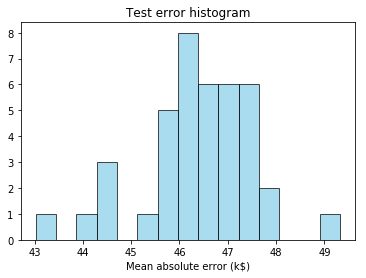

In [54]:
cv_results["test_error"].hist(bins = 15, color = 'skyblue', edgecolor = 'black', grid = False, alpha = 0.7)
plt.xlabel("Mean absolute error (k$)")
_= plt.title("Test error histogram")

Analyzing the `test_error`.

In [51]:
print("The mean cross-validated testing error is: "
    f"{cv_results['test_error'].mean():.2f} k$"
)
print("The standard deviation of the testing error is: "
    f"{cv_results['test_error'].std():.2f} k$"
)

The mean cross-validated testing error is: 46.36 k$
The standard deviation of the testing error is: 1.17 k$


Note that the standard deviation is much smaller than the mean: we could summarize that our cross-validation estimate of the testing error is 46.36 ± 1.17 k$. It produces an interval, which can be interpretes as follows: 

- If we were to train a single model on the full dataset (without cross-validation) and then later had access to an unlimited amount of test data, we would expect its true testing error to fall close to that region.

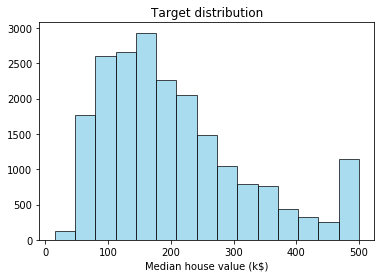

In [56]:
target.hist(bins = 15, color = 'skyblue', edgecolor = 'black', grid = False, alpha = 0.7)
plt.xlabel("Median house value (k$)")
_= plt.title("Target distribution")

The target variable ranges from close to 0 k\$ up to 500 k\$ and.

In [57]:
print(f"The standard deviation of the target is: {target.std():.2f} k$")

The standard deviation of the target is: 115.40 k$


In [61]:
from sklearn.model_selection import KFold, cross_validate

# Create K-Fold (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use in cross_validate
kf_results = cross_validate(regressor, data, target, cv=kf, scoring="neg_mean_absolute_error")

In [65]:
kf_results = pd.DataFrame(kf_results)
kf_results

,fit_time,score_time,test_score
0,0.198866,0.003002,-45.281703
1,0.169001,0.000000,-46.690788
2,0.176463,0.000000,-45.920921
3,0.202217,0.000000,-45.422763
4,0.182919,0.003003,-46.166124


In [66]:
kf_results["test_error"] = -cv_results["test_score"]

In [67]:
print("The mean cross-validated testing error is: "
    f"{kf_results['test_error'].mean():.2f} k$"
)
print("The standard deviation of the testing error is: "
    f"{kf_results['test_error'].std():.2f} k$"
)

The mean cross-validated testing error is: 46.53 k$
The standard deviation of the testing error is: 1.32 k$
